### **EJEMPLO 2A**: TRABAJO SOBRE EL OBJETO (P2)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
kernel = np.ones((3, 3), np.uint8)


In [2]:
img = cv2.imread('m&m.jpg')

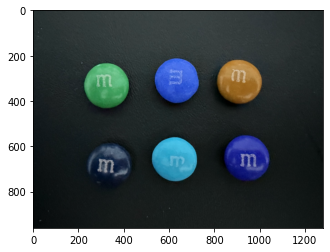

In [3]:
plt.imshow(img) # cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.show()


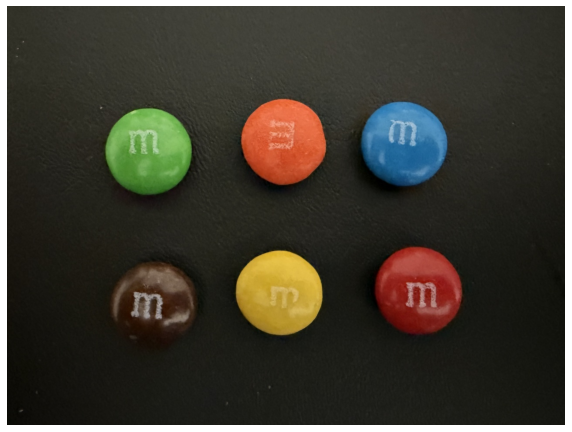

In [92]:
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

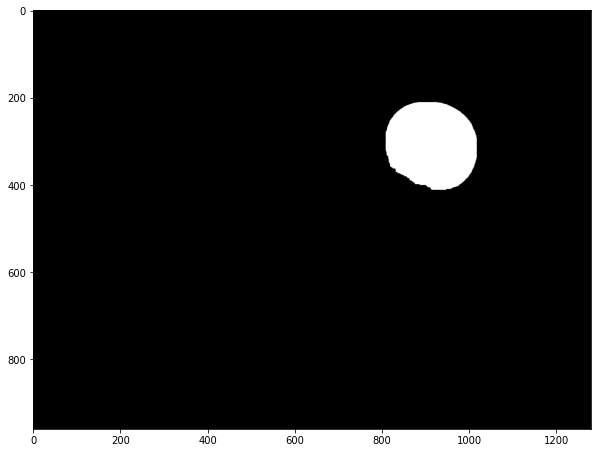

In [68]:
# canal azul
img_b = img[:,:,0].copy()
_, img_b_th = cv2.threshold(img_b, 125, 255, cv2.THRESH_BINARY) # separo el m&m azul
# aplico erode 
img_b_er = cv2.erode(img_b_th, kernel, iterations = 6)
img_b_di = cv2.dilate(img_b_er, kernel, iterations = 15)
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img_b_di, cv2.COLOR_BGR2RGB))
plt.show()



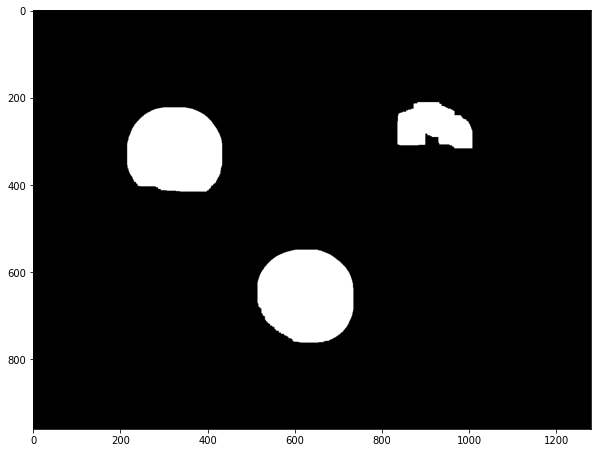

In [69]:
# canal verde
img_g = img[:,:,1].copy()
_, img_g_th = cv2.threshold(img_g, 130, 255, cv2.THRESH_BINARY) # separo el m&m azul
img_g_er = cv2.erode(img_g_th, kernel, iterations = 8)
img_g_di = cv2.dilate(img_g_er, kernel, iterations = 20)
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img_g_di, cv2.COLOR_BGR2RGB))
plt.show()

# separo el m&m verde y amarillo

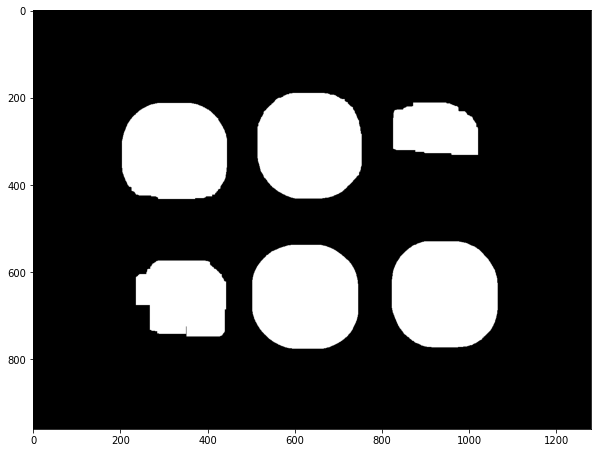

In [70]:
# canal rojo
img_r = img[:,:,2].copy()
_, img_r_th = cv2.threshold(img_r, 65, 255, cv2.THRESH_BINARY) # separo el m&m azul
img_r_er = cv2.erode(img_r_th, kernel, iterations = 8)
img_r_di = cv2.dilate(img_r_er, kernel, iterations = 30)
plt.figure(figsize=[10,10])

plt.imshow(cv2.cvtColor(img_r_di, cv2.COLOR_BGR2RGB))
plt.show()
# separo el m&m rojo naranja amarillo 

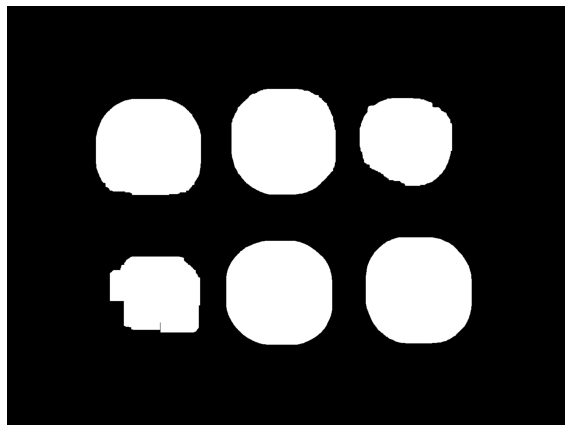

In [91]:
img_c = cv2.bitwise_or(img_b_di, img_g_di)
img_c = cv2.bitwise_or(img_c, img_r_di)
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [83]:

c, h = cv2.findContours(img_c, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_z = img.copy()

#cv2.drawContours(img_z, c, -1, (0,0,255), 3)

print(len(c))

6


In [84]:
for i in c: 
    area = cv2.contourArea(i)
    print(area)
    if area > 1:
        x, y, w, h = cv2.boundingRect(i) 
        cv2.rectangle(img_z, (x, y), (x + w, y + h), (0, 255, 0), 3)

30387.5
49280.0
50462.0
46191.5
34452.0
49206.0


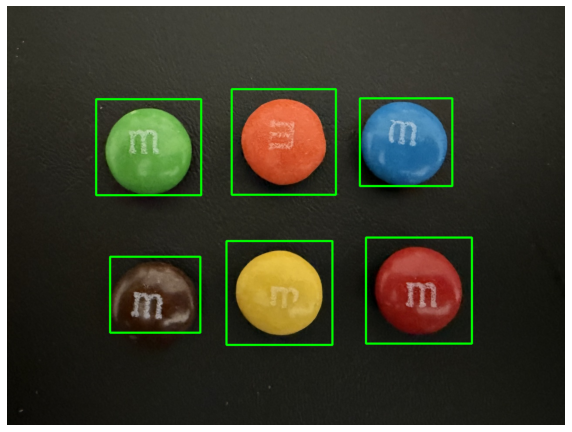

In [90]:
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img_z, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.show()
